In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Automobile.csv')

In [3]:
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


## Data cleaning

In [4]:
## check the missing values
df.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
mean=df['horsepower'].mean()

In [7]:
df['horsepower']=df['horsepower'].fillna(mean)

In [9]:
df.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [10]:
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [12]:
df.drop('name',axis=1,inplace=True)

In [13]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [14]:
df['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
encoder=LabelEncoder()

In [25]:
df1=pd.DataFrame(encoder.fit_transform(df['origin']),columns=['origin1'])

In [29]:
df3=pd.concat([df,df1],axis=1)

In [31]:
df3

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin1
0,18.0,8,307.0,130.0,3504,12.0,70,2
1,15.0,8,350.0,165.0,3693,11.5,70,2
2,18.0,8,318.0,150.0,3436,11.0,70,2
3,16.0,8,304.0,150.0,3433,12.0,70,2
4,17.0,8,302.0,140.0,3449,10.5,70,2
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,2
394,44.0,4,97.0,52.0,2130,24.6,82,0
395,32.0,4,135.0,84.0,2295,11.6,82,2
396,28.0,4,120.0,79.0,2625,18.6,82,2


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


# EDA 

In [34]:
df3.to_csv('Automobile_cleaned1_dataset.csv',index=False)

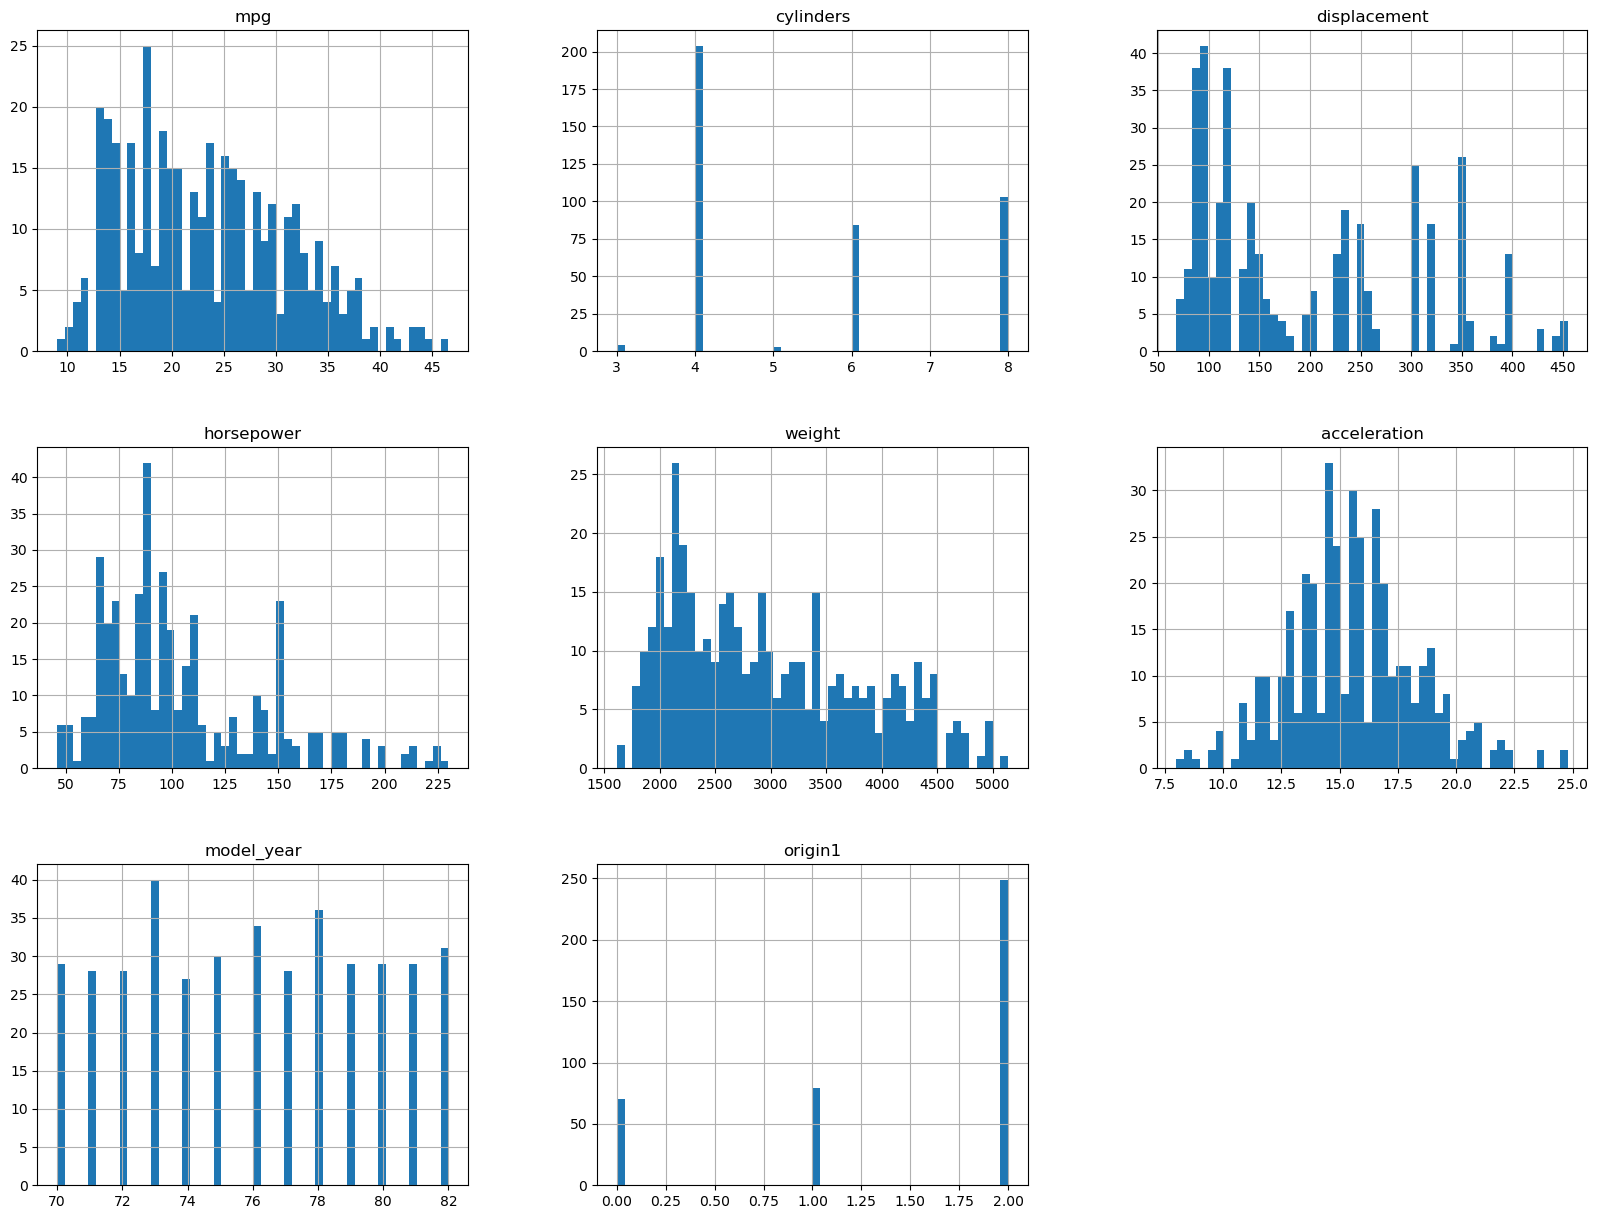

In [35]:
df3.hist(bins=50,figsize=(20,15))
plt.show()

In [37]:
df3.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin1
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,-0.482619
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,0.551378
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,0.591137
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,0.442222
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,0.521088
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,-0.257365
model_year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,-0.075409
origin1,-0.482619,0.551378,0.591137,0.442222,0.521088,-0.257365,-0.075409,1.000000


<AxesSubplot: >

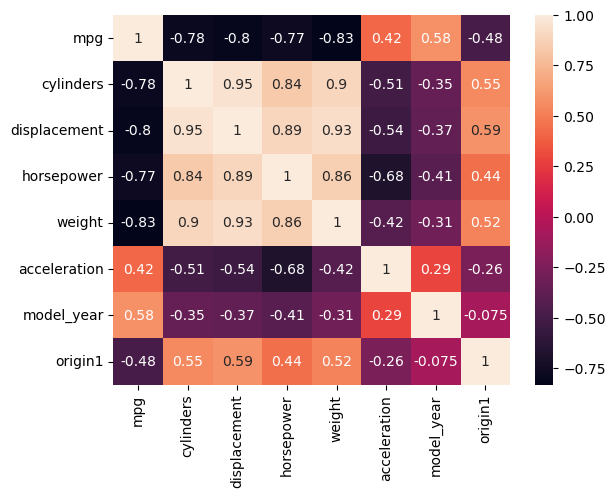

In [38]:
sns.heatmap(df3.corr(),annot=True)